In [1]:
## Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('Firm_level_data (3) (2) (2) (1).csv')

In [3]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [4]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,759.0,NaN,NaN,NaN,379.0,219.248717,0.0,189.5,379.0,568.5,758.0
sales,759.0,NaN,NaN,NaN,2689.705158,8722.060124,0.138,122.92,448.577082,1822.547366,135696.7882
capital,759.0,NaN,NaN,NaN,1977.747498,6466.704896,0.057,52.650501,202.179023,1075.79002,93625.20056
patents,759.0,NaN,NaN,NaN,25.831357,97.259577,0.0,1.0,3.0,11.5,1220.0
randd,759.0,NaN,NaN,NaN,439.938074,2007.397588,0.0,4.628262,36.864136,143.253403,30425.25586
employment,759.0,NaN,NaN,NaN,14.164519,43.321443,0.006,0.9275,2.924,10.050001,710.799925
sp500,759,2,no,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tobinq,738.0,NaN,NaN,NaN,2.79491,3.366591,0.119001,1.018783,1.680303,3.139309,20.0
value,759.0,NaN,NaN,NaN,2732.73475,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.59116
institutions,759.0,NaN,NaN,NaN,43.02054,21.685586,0.0,25.395,44.11,60.51,90.15


In [6]:
df.shape

(759, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [8]:
## Null value check
df.isnull().sum()


Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [9]:
 #Percentage of missing values
100 * df.isnull().sum() / len(df)


Unnamed: 0      0.000000
sales           0.000000
capital         0.000000
patents         0.000000
randd           0.000000
employment      0.000000
sp500           0.000000
tobinq          2.766798
value           0.000000
institutions    0.000000
dtype: float64

In [10]:
df2=df.drop(['Unnamed: 0'], axis = 1)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [12]:
df2.head()


,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [13]:
## check for duplicates in data
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [14]:
## unique values for categorical variables
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')


SP500 :  2
yes    217
no     542
Name: sp500, dtype: int64




In [15]:
 ##Treating Null value
mean_value=df2['tobinq'].mean()
df2['tobinq'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df2)


Updated Dataframe:
           sales      capital  patents        randd  employment sp500  \
0     826.995050   161.603986       10   382.078247    2.306000    no   
1     407.753973   122.101012        2     0.000000    1.860000    no   
2    8407.845588  6221.144614      138  3296.700439   49.659005   yes   
3     451.000010   266.899987        1    83.540161    3.071000    no   
4     174.927981   140.124004        2    14.233637    1.947000    no   
..           ...          ...      ...          ...         ...   ...   
754  1253.900196   708.299935       32   412.936157   22.100002   yes   
755   171.821025    73.666008        1     0.037735    1.684000    no   
756   202.726967   123.926991       13    74.861099    1.460000    no   
757   785.687944   138.780992        6     0.621750    2.900000   yes   
758    22.701999    14.244999        5    18.574360    0.197000    no   

        tobinq         value  institutions  
0    11.049511   1625.453755         80.27  
1     0.844187

In [16]:
df2.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [17]:
df2.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sales,759.0,NaN,NaN,NaN,2689.705158,8722.060124,0.138,122.92,448.577082,1822.547366,135696.7882
capital,759.0,NaN,NaN,NaN,1977.747498,6466.704896,0.057,52.650501,202.179023,1075.79002,93625.20056
patents,759.0,NaN,NaN,NaN,25.831357,97.259577,0.0,1.0,3.0,11.5,1220.0
randd,759.0,NaN,NaN,NaN,439.938074,2007.397588,0.0,4.628262,36.864136,143.253403,30425.25586
employment,759.0,NaN,NaN,NaN,14.164519,43.321443,0.006,0.9275,2.924,10.050001,710.799925
sp500,759,2,no,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tobinq,759.0,NaN,NaN,NaN,2.79491,3.319629,0.119001,1.036,1.7418,3.082979,20.0
value,759.0,NaN,NaN,NaN,2732.73475,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.59116
institutions,759.0,NaN,NaN,NaN,43.02054,21.685586,0.0,25.395,44.11,60.51,90.15


<AxesSubplot:xlabel='sp500'>

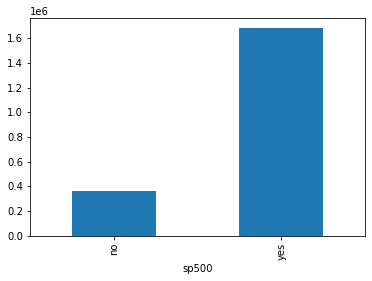

In [18]:
df2.groupby('sp500')['sales'].sum().plot(kind='bar')

Text(0.5, 1.0, 'value Distribution')

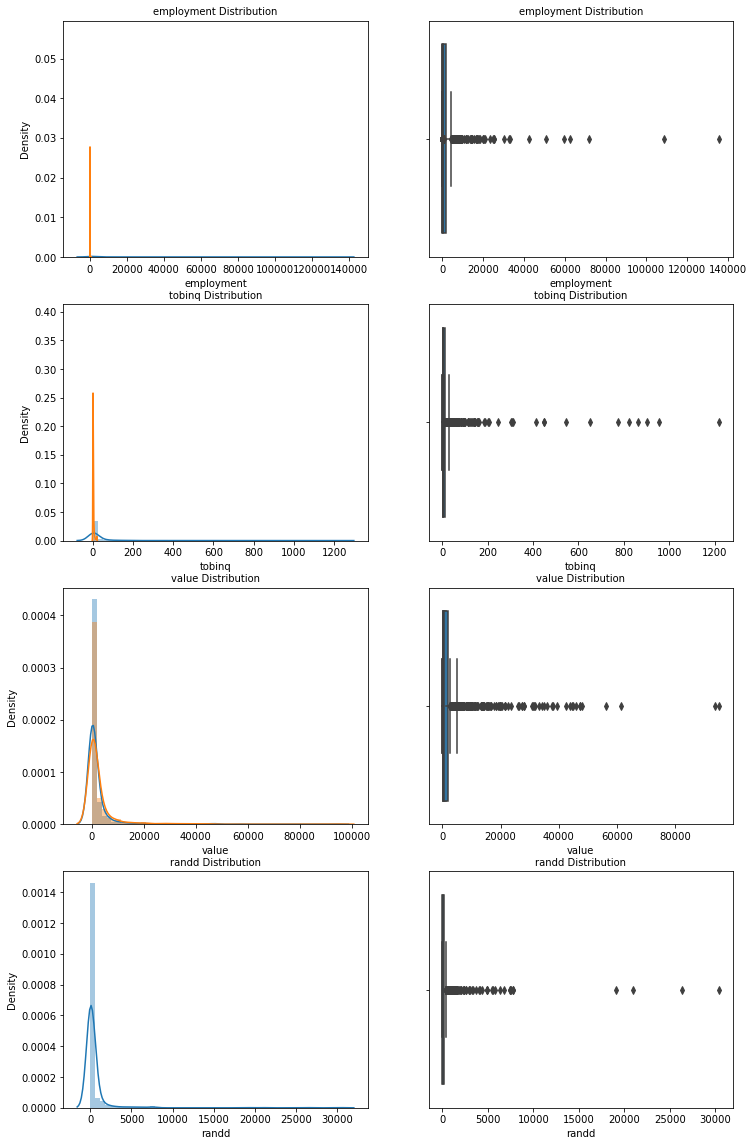

In [19]:
def plot_distribution(df2, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
    
a = sns.distplot(df2['sales'] , ax=axes[0][0])
a.set_title("sales Distribution",fontsize=10)
a = sns.boxplot(df2['sales'] , orient = "v" , ax=axes[0][1])
a.set_title("sales Distribution",fontsize=15)

a = sns.distplot(df2['patents'] , ax=axes[1][0])
a.set_title("patents Distribution",fontsize=10)
a = sns.boxplot(df2['patents'] , orient = "v" , ax=axes[1][1])
a.set_title("patents Distribution",fontsize=10)
                           
a = sns.distplot(df2['capital'] ,ax=axes[2][0])
a.set_title("capitalDistribution",fontsize=10)
a = sns.boxplot(df2['capital'] , orient = "v" ,ax=axes[2][1])
a.set_title("capital Distribution",fontsize=10)
                           
a = sns.distplot(df2['randd'] ,ax=axes[3][0])
a.set_title("randd Distribution",fontsize=10)
a = sns.boxplot(df2['randd'] , orient = "v" , ax=axes[3][1])
a.set_title("randd Distribution",fontsize=10)

a = sns.distplot(df2['employment'] ,ax=axes[0][0])
a.set_title("employment Distribution",fontsize=10)
a = sns.boxplot(df2['employment'] , orient = "v" ,ax=axes[0][1]) 
a.set_title("employment Distribution",fontsize=10)

a = sns.distplot(df2['tobinq'] ,ax=axes[1][0]) 
a.set_title("tobinq Distribution",fontsize=10)
a = sns.boxplot(df2['tobinq'] , orient = "v" ,ax=axes[1][1]) 
a.set_title("tobinq Distribution",fontsize=10)

                           
a = sns.distplot(df2['value'] ,ax=axes[2][0]) 
a.set_title("value Distribution",fontsize=10)
a = sns.boxplot(df2['value'] , orient = "v" ,ax=axes[2][1]) 
a.set_title("value Distribution",fontsize=10)


    


    

Text(0.5, 1.0, 'capital Distribution')

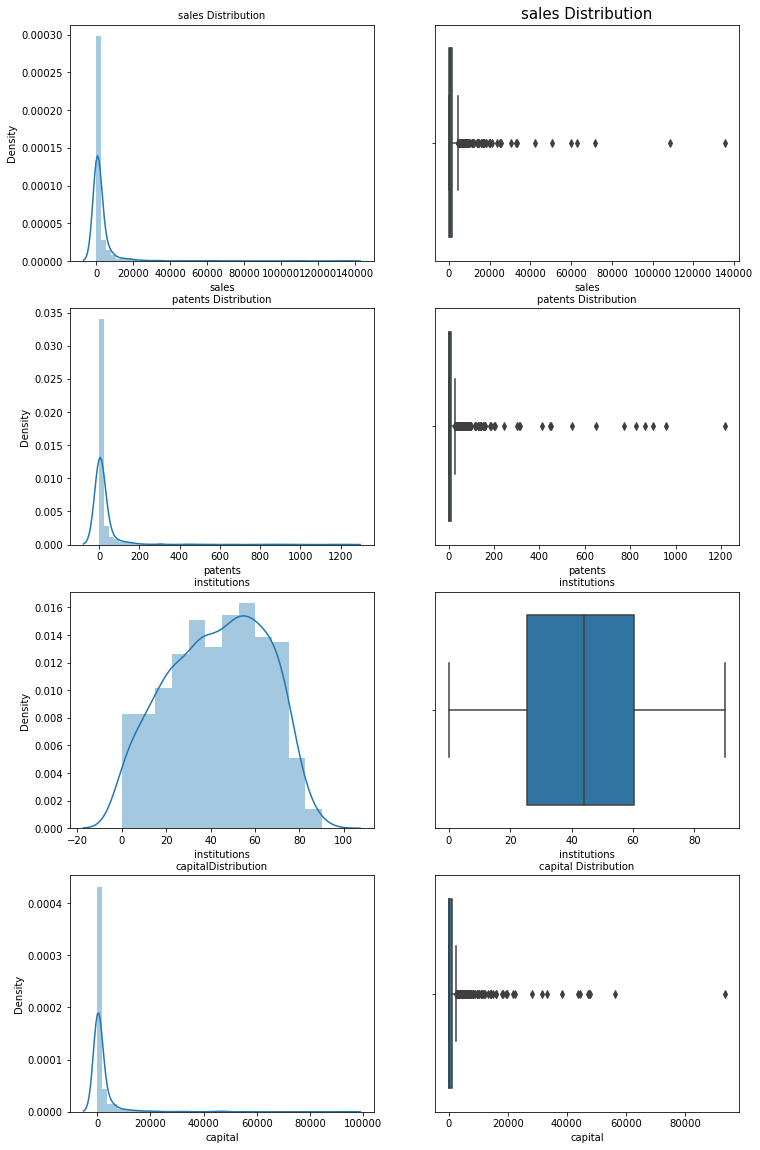

In [20]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):   
    plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows=4,ncols=2) 
fig.set_size_inches(12, 20)
    
a = sns.distplot(df2['sales'] , ax=axes[0][0])
a.set_title("sales Distribution",fontsize=10)
a = sns.boxplot(df2['sales'] , orient = "v" , ax=axes[0][1]) 
a.set_title("sales Distribution",fontsize=15)
    
a = sns.distplot(df2['patents'] , ax=axes[1][0]) 
a.set_title("patents Distribution",fontsize=10)
a = sns.boxplot(df2['patents'] , orient = "v" , ax=axes[1][1]) 
a.set_title("patents Distribution",fontsize=10)
    
a = sns.distplot(df2['institutions'] , ax=axes[2][0]) 
a.set_title("institutions",fontsize=10)
a = sns.boxplot(df2['institutions'] , orient = "v" , ax=axes[2][1])
a.set_title("institutions",fontsize=10)  

a = sns.distplot(df2['capital'] ,ax=axes[3][0])
a.set_title("capitalDistribution",fontsize=10)
a = sns.boxplot(df2['capital'] , orient = "v" ,ax=axes[3][1])
a.set_title("capital Distribution",fontsize=10)


    
    


In [21]:
df2.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

In [22]:
df2.skew()

sales            9.219023
capital          7.555091
patents          7.766943
randd           10.270483
employment       9.068875
tobinq           3.332006
value            6.075996
institutions    -0.168071
dtype: float64

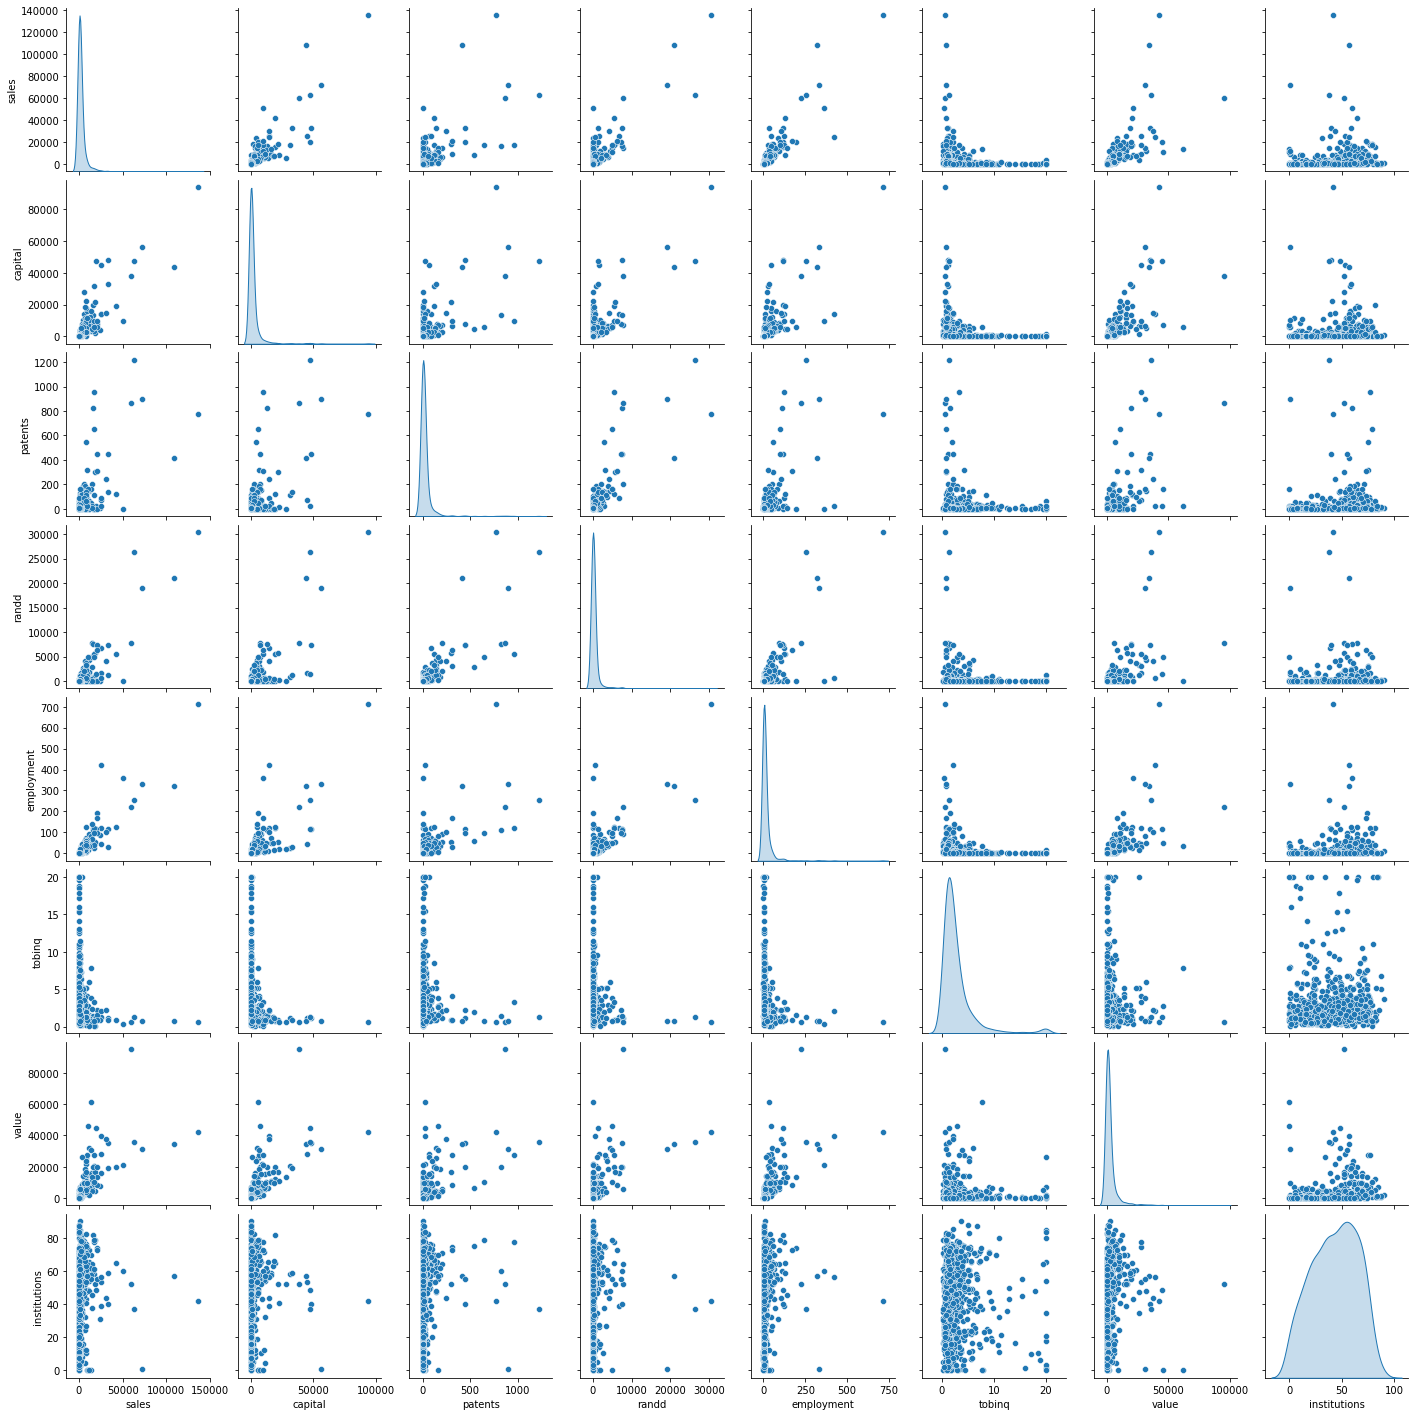

In [23]:
### Data Distribution
sns.pairplot(df2,diag_kind='kde') 

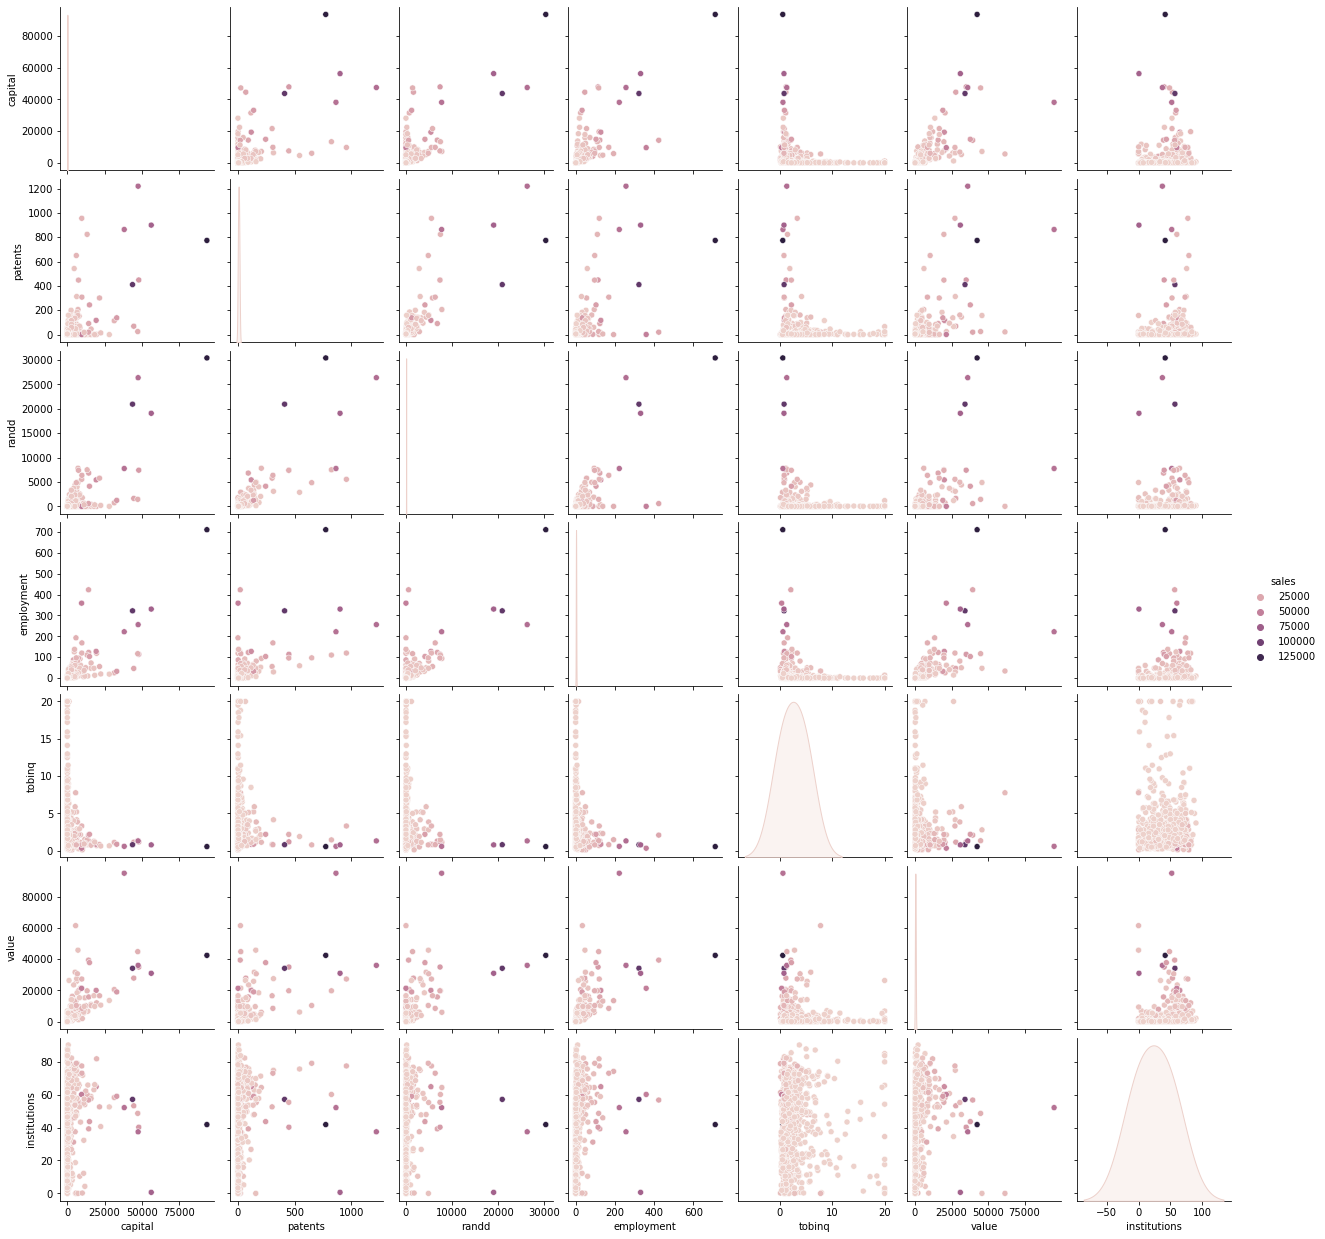

In [24]:
sns.pairplot(df2,diag_kind='kde',hue='sales');

<AxesSubplot:>

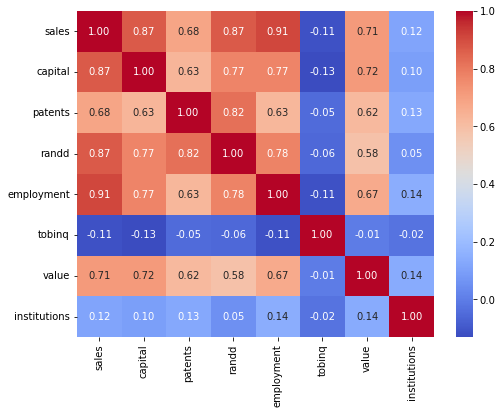

In [25]:
## checking for Correlations
df_cor = df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [26]:
df2[df2.isin([0])].stack(0)


1    randd      0.0
6    patents    0.0
7    randd      0.0
18   patents    0.0
22   patents    0.0
               ... 
744  patents    0.0
746  randd      0.0
749  patents    0.0
     randd      0.0
751  patents    0.0
Length: 280, dtype: object

In [27]:
for column in df2.columns:
    if df2[column].dtype != 'object':
        median = df2[column].median()
        df2[column] = df2[column].fillna(median) 
df.isnull().sum()

Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [28]:
df2.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [29]:
df2.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [30]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

## Get numeric data
num_d = df2.select_dtypes(exclude=['object'])

## Fit and transform the numeric columns using StandardScaler
df2[num_d.columns] = sc.fit_transform(num_d)
print(df2)
  

        sales   capital   patents     randd  employment sp500        tobinq  \
0   -0.213704 -0.281030 -0.162882 -0.028842   -0.273914    no  2.488244e+00   
1   -0.261802 -0.287143 -0.245190 -0.219303   -0.284216    no -5.880202e-01   
2    0.656027  0.656624  1.154052  1.424056    0.819869   yes  7.265682e-01   
3   -0.256841 -0.264737 -0.255479 -0.177659   -0.256243    no -7.504845e-01   
4   -0.288514 -0.284354 -0.245190 -0.212208   -0.282206    no -5.219715e-01   
..        ...       ...       ...       ...         ...   ...           ...   
754 -0.164726 -0.196435  0.063466 -0.013460    0.183298   yes -6.322510e-01   
755 -0.288870 -0.294638 -0.255479 -0.219284   -0.288281    no  1.874110e-15   
756 -0.285325 -0.286861 -0.132016 -0.181986   -0.293455    no  7.339434e-01   
757 -0.218443 -0.284562 -0.204036 -0.218993   -0.260193   yes -3.525343e-01   
758 -0.305978 -0.303833 -0.214324 -0.210044   -0.322628    no -1.753881e-01   

        value  institutions  
0   -0.156696      1.

In [31]:
df2.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.213704,-0.281030,-0.162882,-0.028842,-0.273914,no,2.488244,-0.156696,1.718839
1,-0.261802,-0.287143,-0.245190,-0.219303,-0.284216,no,-0.588020,-0.352317,0.738279
2,0.656027,0.656624,1.154052,1.424056,0.819869,yes,0.726568,3.273585,0.215929
3,-0.256841,-0.264737,-0.255479,-0.177659,-0.256243,no,-0.750485,-0.377803,-0.744789
4,-0.288514,-0.284354,-0.245190,-0.212208,-0.282206,no,-0.521972,-0.377183,0.297142


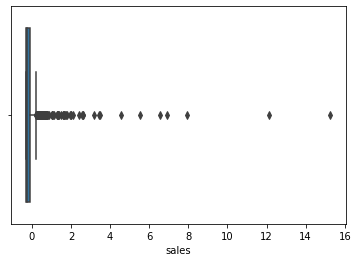

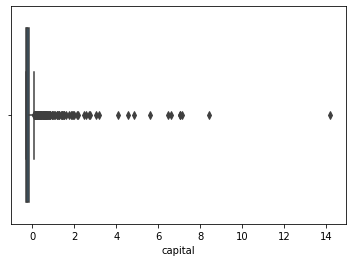

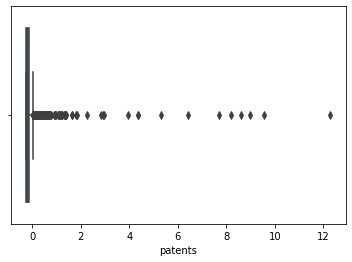

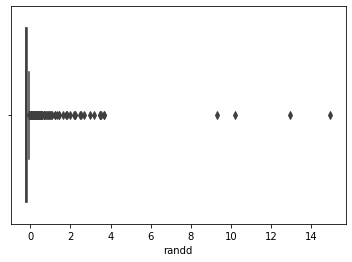

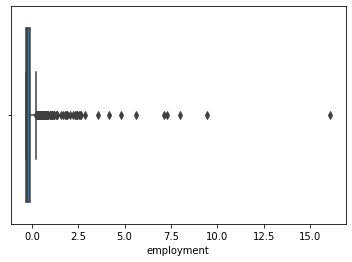

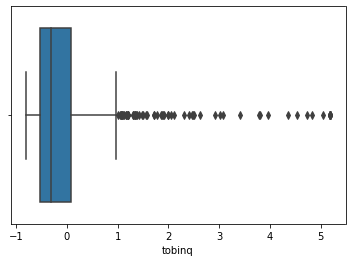

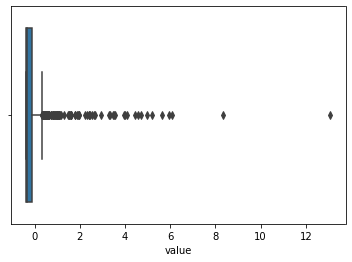

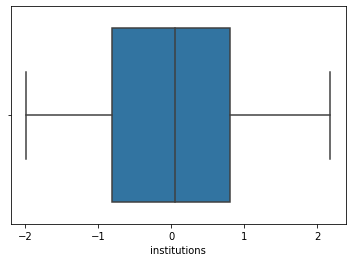

In [32]:

cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Create boxplots for each column in cols
for i in cols:
    sns.boxplot(df2[i])
    plt.show()
    


In [33]:
cont=df2.dtypes[(df2.dtypes!='uint8') & (df2.dtypes!='object')].index

In [34]:
def remove_outlier(col):
    sorted_col = sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [35]:
for column in df2[cont].columns:
    lower_bound, upper_bound = remove_outlier(df2[column])
    df2[column] = np.where(df2[column] > upper_bound, upper_bound, df2[column])
    df2[column] = np.where(df2[column] < lower_bound, lower_bound, df2[column])


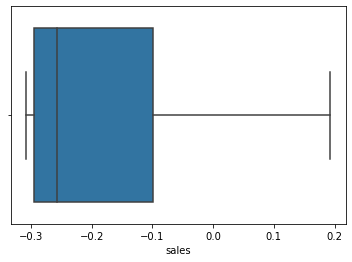

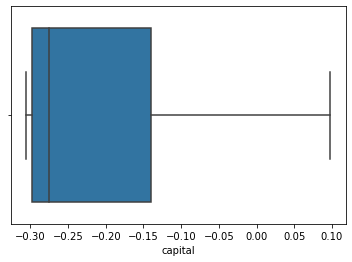

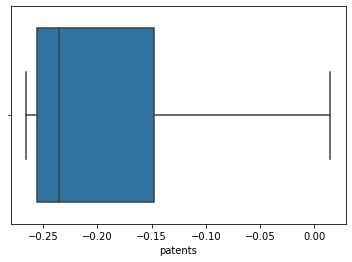

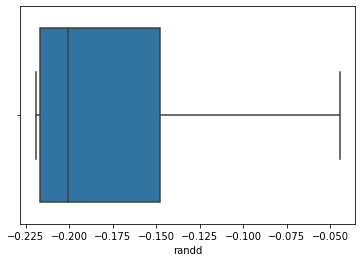

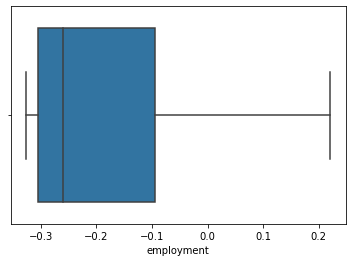

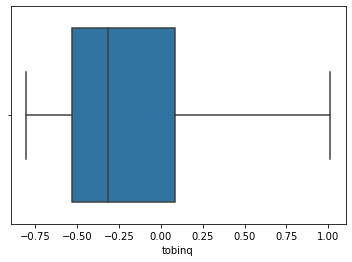

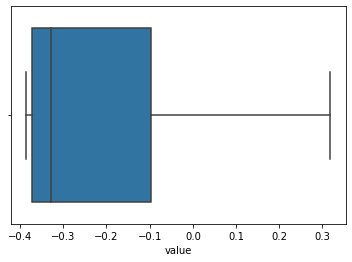

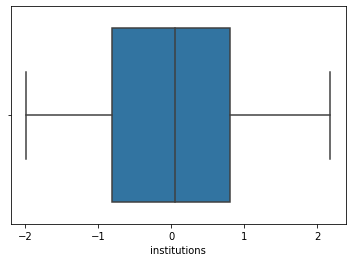

In [36]:
cols = ['sales' ,'capital', 'patents', 'randd',
'employment','tobinq','value','institutions']
for i in cols:
    sns.boxplot(df2[i])
    plt.show()


In [37]:
###ALTERNATE METHOD FOR DECTECTING AND REMOVING OUTLIERS.
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):   
    plt.style.use('seaborn-whitegrid')
    fig, axes = plt.subplots(nrows=4, ncols=2) 
    fig.set_size_inches(12, 20)
    
    for col, ax in zip(df.columns, axes.flatten()):
        # Remove outliers
        lower_bound, upper_bound = remove_outliers(df[col])
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Plot distribution
        a = sns.distplot(df[col], ax=ax)
        a.set_title(f"{col} Distribution", fontsize=10)
        
        # Plot boxplot
        a = sns.boxplot(df[col], orient="v", ax=ax)
        a.set_title(f"{col} Distribution", fontsize=10)

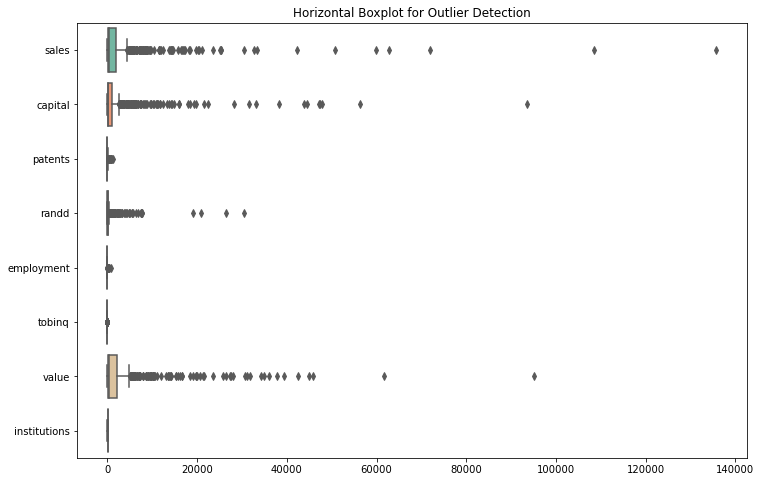

In [38]:
#outlier detection
data = df[['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']]

# Create a horizontal boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, palette="Set2", orient="h")
plt.title("Horizontal Boxplot for Outlier Detection")
plt.show()


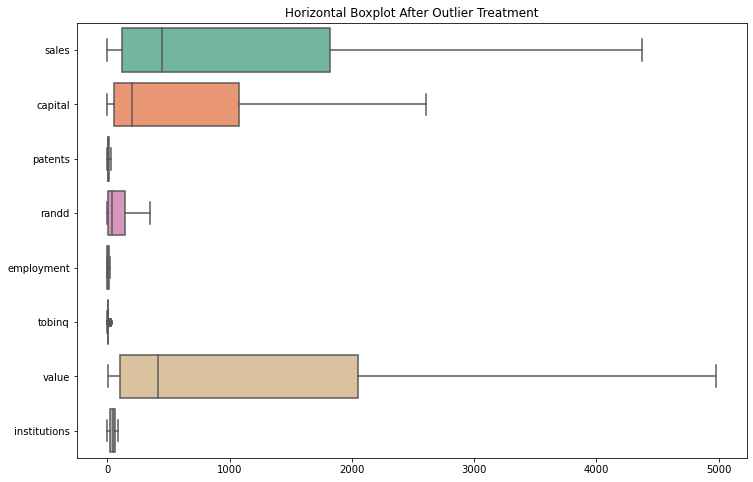

In [39]:
#Treating Outlier
def remove_outlier(col):
    sorted_col = sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


data = df[['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']]

# Remove outliers
for column in data.columns:
    lower_bound, upper_bound = remove_outlier(data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# Create a boxplot after treating outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, palette="Set2", orient="h")
plt.title("Horizontal Boxplot After Outlier Treatment")
plt.show()

In [40]:
## Converting categorical to dummy variables in data
data = pd.get_dummies(df2,columns=['sp500'],drop_first=True)
data.head()


,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.044239,-0.273914,1.012388,-0.156696,1.718839,0
1,-0.261802,-0.287143,-0.245190,-0.219303,-0.284216,-0.588020,-0.352317,0.738279,0
2,0.193004,0.097912,0.014596,-0.044239,0.221035,0.726568,0.318022,0.215929,1
3,-0.256841,-0.264737,-0.255479,-0.177659,-0.256243,-0.750485,-0.377803,-0.744789,0
4,-0.288514,-0.284354,-0.245190,-0.212208,-0.282206,-0.521972,-0.377183,0.297142,0


In [41]:
data.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes'],
      dtype='object')

In [42]:
## Train/ Test split - Unrequried column already drop
data_model= data
data_model.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes'],
      dtype='object')

In [43]:
data_model.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.044239,-0.273914,1.012388,-0.156696,1.718839,0
1,-0.261802,-0.287143,-0.245190,-0.219303,-0.284216,-0.588020,-0.352317,0.738279,0
2,0.193004,0.097912,0.014596,-0.044239,0.221035,0.726568,0.318022,0.215929,1
3,-0.256841,-0.264737,-0.255479,-0.177659,-0.256243,-0.750485,-0.377803,-0.744789,0
4,-0.288514,-0.284354,-0.245190,-0.212208,-0.282206,-0.521972,-0.377183,0.297142,0


In [44]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500_yes     759 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 48.3 KB


In [45]:
 #Copy all the predictor variables into X dataframe
X = data_model.drop('sales', axis=1)
# Copy target into the y dataframe.
y = data_model[['sales']]


In [46]:
X.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.281030,-0.162882,-0.044239,-0.273914,1.012388,-0.156696,1.718839,0
1,-0.287143,-0.245190,-0.219303,-0.284216,-0.588020,-0.352317,0.738279,0
2,0.097912,0.014596,-0.044239,0.221035,0.726568,0.318022,0.215929,1
3,-0.264737,-0.255479,-0.177659,-0.256243,-0.750485,-0.377803,-0.744789,0
4,-0.284354,-0.245190,-0.212208,-0.282206,-0.521972,-0.377183,0.297142,0


In [47]:
X.shape

(759, 8)

In [48]:
y.head()

,sales
0,-0.213704
1,-0.261802
2,0.193004
3,-0.256841
4,-0.288514


In [49]:
y.shape

(759, 1)

In [50]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [51]:
## Linear Regression Model
# invoke the LinearRegression function and find the bestfit model ontraining data
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)


LinearRegression()

In [52]:
 #Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
     print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))


The coefficient for capital is 0.301130772357497
The coefficient for patents is -0.05182228026280135
The coefficient for randd is 0.14727057526359902
The coefficient for employment is 0.3904650885472138
The coefficient for tobinq is -0.015195812780800377
The coefficient for value is 0.19832044097869567
The coefficient for institutions is 0.0005406156939786675
The coefficient for sp500_yes is 0.019059904893127286


In [74]:
 ##Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


The intercept for our model is 0.003171815864222438


In [54]:
# R square on training data
regression_model.score(X_train, y_train)

0.9358806629736066

In [55]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9241294393352393

In [56]:
##RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.04527292369567991

In [57]:
##RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))


0.04586150560808145

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
vif = [variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]
vif

[13.805205481921233,
 10.95071455609413,
 16.406758142361557,
 9.428029192001835,
 1.5447372799339492,
 9.490559946775965,
 1.291286159131487,
 2.6380766428382145]

In [59]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",vif[i])
        i = i+1

capital ---> 13.805205481921233
patents ---> 10.95071455609413
randd ---> 16.406758142361557
employment ---> 9.428029192001835
tobinq ---> 1.5447372799339492
value ---> 9.490559946775965
institutions ---> 1.291286159131487
sp500_yes ---> 2.6380766428382145


In [60]:
## Using Statsmodel library
data_train = pd.concat([X_train, y_train],axis=1)
data_train.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,-0.102446,-0.111439,-0.182776,0.053299,-0.342854,-0.070880,-0.532988,0,-0.085183
333,-0.303676,-0.245190,-0.214691,-0.314105,-0.727415,-0.385324,-0.984276,0,-0.301662
257,-0.222758,-0.059996,-0.175741,-0.174105,-0.201412,-0.242456,1.228328,0,-0.186312
173,-0.181128,-0.265767,-0.184957,-0.151469,0.107480,-0.072309,1.230635,1,-0.171639
242,-0.243753,-0.245190,-0.219303,-0.291376,-0.193077,-0.336054,1.956480,0,-0.289752


In [61]:
data_train.columns

Index(['capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes', 'sales'],
      dtype='object')

In [62]:
import statsmodels.formula.api as smf

# Assuming df2 is your DataFrame
lm1 = smf.ols(formula='sales ~ capital + patents + randd + employment + tobinq + value + institutions' , data=df2)
lm1_result = lm1.fit()

# Print the parameters
print(lm1_result.params)


Intercept       0.005127
capital         0.291260
patents        -0.034442
randd           0.083320
employment      0.412885
tobinq         -0.016113
value           0.213798
institutions    0.002314
dtype: float64


In [63]:
print(lm1_result.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1505.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:50:03   Log-Likelihood:                 1273.1
No. Observations:                 759   AIC:                            -2530.
Df Residuals:                     751   BIC:                            -2493.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0051      0.006      0.900   

In [64]:
## Let us check the sum of squared errors by predicting value of y for testcases and # subtracting from the actual y for the test cases
mse = np.mean((regression_model.predict(X_test)-y_test)**2)


In [65]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predict
import math
math.sqrt(mse)


0.045861505608081436

In [66]:
# Model score - R2 or coeff of determinant # R^2=1–RSS / TSS
regression_model.score(X_test, y_test)


0.9241294393352393

In [67]:
 #predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

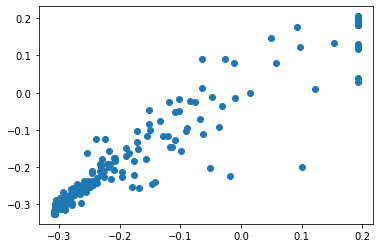

In [68]:
plt.scatter(y_test['sales'], y_pred)


In [69]:
# Assuming data_model  DataFrame
lm2 = smf.ols(formula='sales ~ capital + patents + randd + employment + tobinq + value + institutions + sp500_yes', data=data_model)
lm2_result = lm2.fit()

# Print the parameters
print(lm2_result.params)


Intercept       0.001503
capital         0.290044
patents        -0.034812
randd           0.081424
employment      0.408702
tobinq         -0.016049
value           0.210228
institutions    0.001958
sp500_yes       0.005677
dtype: float64


In [70]:
print(lm2_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:50:03   Log-Likelihood:                 1273.6
No. Observations:                 759   AIC:                            -2529.
Df Residuals:                     750   BIC:                            -2487.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0015      0.007      0.218   

In [71]:
 ##concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,-0.102446,-0.111439,-0.182776,0.053299,-0.342854,-0.070880,-0.532988,0,-0.085183
333,-0.303676,-0.245190,-0.214691,-0.314105,-0.727415,-0.385324,-0.984276,0,-0.301662
257,-0.222758,-0.059996,-0.175741,-0.174105,-0.201412,-0.242456,1.228328,0,-0.186312
173,-0.181128,-0.265767,-0.184957,-0.151469,0.107480,-0.072309,1.230635,1,-0.171639
242,-0.243753,-0.245190,-0.219303,-0.291376,-0.193077,-0.336054,1.956480,0,-0.289752


In [72]:
data_test.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
480,-0.298194,-0.255479,-0.195788,-0.300685,-0.539193,-0.381837,-0.373791,0,-0.298480
622,-0.293509,-0.234901,-0.194253,-0.248644,-0.462711,-0.363394,-1.113941,0,-0.273124
638,-0.132883,-0.070285,-0.180110,0.111415,-0.269635,-0.087443,0.227003,1,-0.047796
389,-0.295400,-0.234901,-0.196957,-0.299368,-0.160494,-0.375077,-0.847690,0,-0.294435
748,-0.258258,-0.245190,-0.179909,-0.251785,-0.317446,-0.311286,-1.244528,0,-0.270590


In [73]:
for i,j in np.array(lm2_result.params.reset_index()):
    

    print( '({}) * {} +'.format(round(j,2),i),end=' ')


(0.0) * Intercept + (0.29) * capital + (-0.03) * patents + (0.08) * randd + (0.41) * employment + (-0.02) * tobinq + (0.21) * value + (0.0) * institutions + (0.01) * sp500_yes + 